#Beta sensitivity testing
In this script I do a basic sensitivity analysis of the parameters beta and k.

  9.269412 seconds (148.38 M allocations: 7.799 GiB, 30.06% gc time)


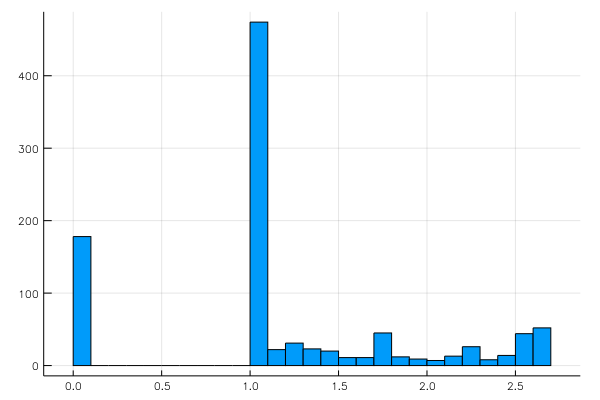

In [1]:
include("coinf_model.jl")

Values of beta for each species, based on trial and error:

In [2]:
b_N_a_full = linspace(5e-11, 5e-9, 10)
b_A_l_full = linspace(5e-11, 5e-8, 10)
b_T_t_full = linspace(1e-9, 5e-8, 10)

1.0e-9:5.444444444444444e-9:5.0e-8

Values of k for each species, based on fitted values of k from the Sri Lanka data:

In [3]:
k_N_a = [0.01, 0.2, 0.4]
k_A_l = [0.01, 0.2, 0.4]
k_T_t = [0.11, 0.21, 0.31]

3-element Array{Float64,1}:
 0.11
 0.21
 0.31

Get all combinations of the beta and k vaules for testing

In [4]:
N_a_tup = collect(Base.product(b_N_a_full,k_N_a))
A_l_tup = collect(Base.product(b_A_l_full,k_A_l))
T_t_tup = collect(Base.product(b_T_t_full,k_T_t))

10×3 Array{Tuple{Float64,Float64},2}:
 (1.0e-9, 0.11)      (1.0e-9, 0.21)      (1.0e-9, 0.31)    
 (6.44444e-9, 0.11)  (6.44444e-9, 0.21)  (6.44444e-9, 0.31)
 (1.18889e-8, 0.11)  (1.18889e-8, 0.21)  (1.18889e-8, 0.31)
 (1.73333e-8, 0.11)  (1.73333e-8, 0.21)  (1.73333e-8, 0.31)
 (2.27778e-8, 0.11)  (2.27778e-8, 0.21)  (2.27778e-8, 0.31)
 (2.82222e-8, 0.11)  (2.82222e-8, 0.21)  (2.82222e-8, 0.31)
 (3.36667e-8, 0.11)  (3.36667e-8, 0.21)  (3.36667e-8, 0.31)
 (3.91111e-8, 0.11)  (3.91111e-8, 0.21)  (3.91111e-8, 0.31)
 (4.45556e-8, 0.11)  (4.45556e-8, 0.21)  (4.45556e-8, 0.31)
 (5.0e-8, 0.11)      (5.0e-8, 0.21)      (5.0e-8, 0.31)    

Function to do the testing

In [5]:
sp_test = function(p_var, p, sp)

  eggs = zeros(Float64, 2000, length(p_var))

  for i in 1:length(p_var)

    p[sp].b = p_var[i][1]
    p[sp].k = p_var[i][2]

    #rr is 0 (if set run_record = 0 get record of whole run); a is ages
    rr, final_record, a = main(1000, 2000)
    eggs[:,i] = final_record[:EOut][:,sp]
  end

  return eggs
end

(::#38) (generic function with 1 method)

Each set of testing takes just under 2 minutes

In [6]:
@time N_a_b_sensitivity = sp_test(N_a_tup, SpPars, 1)
@time A_l_b_sensitivity = sp_test(A_l_tup, SpPars, 1)
@time T_t_b_sensitivity = sp_test(T_t_tup, SpPars, 1)

104.829098 seconds (2.27 G allocations: 88.121 GiB, 24.82% gc time)
103.751263 seconds (2.27 G allocations: 88.119 GiB, 25.33% gc time)
122.228927 seconds (2.27 G allocations: 88.119 GiB, 23.57% gc time)


2000×30 Array{Float64,2}:
     4.95426e5      0.0          …       5.35355e5        1.50913e6  
     0.0            0.0              77400.5           1071.5        
     0.0           13.797                5.35355e5    40117.2        
     0.0           16.4808           12271.7              0.0521164  
     0.0            0.0                  4.20442e-10      2.78112e-9 
     0.0            0.0          …     917.265            9.85746e5  
     1.93371e6      0.0                  0.0              3.48935e-13
     0.0            2.31358e5            0.000339123      1.77747e6  
     1.92992e6  98117.9                  0.001436         6.61233e-16
 49527.2            0.0                  6.59349e5        0.000303874
     ⋮                           ⋱                                   
     1.36772e6      0.0                  5.63137e-27      1.22012e-27
     0.0        16011.8                  7.22451e-12      1.24233e-22
     0.0        40772.4                  1.00858e6        1.6842

Need to scale the eggs to match the raw data. Egg output from model is all eggs that can be output
for 5 days (timestep = 1/73). Stool sample size if 54mg (0.054g). I assume 100g of stool per day,
therefore scale to per day (i/5) and then to correct concentration (* 0.00054)

In [7]:
scale_N_a_sensitivity = map(i -> i/5 * 0.00054, N_a_b_sensitivity)
scale_A_l_sensitivity = map(i -> i/5 * 0.00054, A_l_b_sensitivity)
scale_T_t_sensitivity = map(i -> i/5 * 0.00054, T_t_b_sensitivity)

2000×30 Array{Float64,2}:
  53.506      0.0            0.0       …   57.8183       162.986      
   0.0        0.0            0.0            8.35926        0.115722   
   0.0        0.00149007     0.0           57.8183         4.33266    
   0.0        0.00177992     0.0            1.32534        5.62857e-6 
   0.0        0.0            0.0            4.54078e-14    3.00361e-13
   0.0        0.0          194.395     …    0.0990646    106.461      
 208.84       0.0            0.0            0.0            3.7685e-17 
   0.0       24.9867         0.0            3.66252e-8   191.967      
 208.431     10.5967         0.0            1.55088e-7     7.14132e-20
   5.34894    0.0            0.0           71.2097         3.28184e-8 
   ⋮                                   ⋱                              
 147.714      0.0            0.0            6.08188e-31    1.31773e-31
   0.0        1.72928        0.0            7.80247e-16    1.34172e-26
   0.0        4.40341        0.0          108.926  

Using the fitdistr function from the MASS package in R - it's just easier. I have adapted the
function slightly, to handle all or almost all 0 data, see fitNB.R file.

In [8]:
using RCall
R"source('fitNB.R')"
@rget fit_nb

(::#33) (generic function with 1 method)

Get mu and k (or mu and size) from the simulated data. Firstly I fit the data using the function
above, I then prepare it for plotting and plot away.

The first plots are model sensitivity to beta and k for N. americanus.

In [9]:
using Plots
N_a_size = hcat([fit_nb(round(scale_N_a_sensitivity[:,x]))[1] for x in 1:30])
N_a_size = hcat(N_a_size[1:10], N_a_size[11:20], N_a_size[21:30])

Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, pa

10×3 Array{Float64,2}:
 0.0         0.0       0.0     
 0.00380976  0.10226   0.217512
 0.00473586  0.128721  0.286733
 0.00595643  0.132009  0.301057
 0.00755152  0.137152  0.282026
 0.00811266  0.148396  0.286007
 0.0071986   0.148067  0.267864
 0.00786919  0.151977  0.264127
 0.00691173  0.135212  0.24239 
 0.00733185  0.135666  0.237288

For the simulated k - it's not completely surprising that the k that is simulated is a bit
different to the k that is given as a parameter, because the parameter k is fitted from EPG
and used in defining infective larvae acquisition, and the simulated k is from the egg output.
Target k for N. americanus is 0.08.

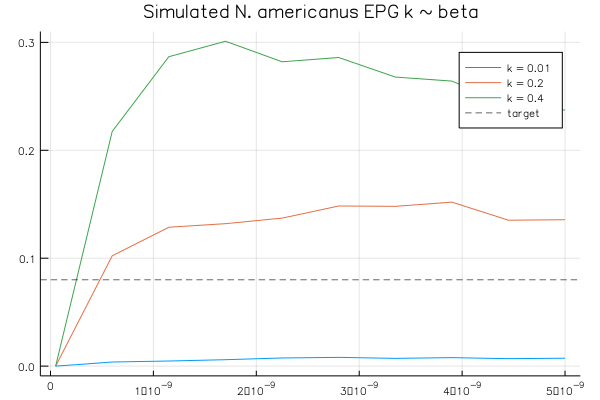

In [10]:
plot(b_N_a_full, N_a_size,
      title = "Simulated N. americanus EPG k ~ beta", label = ["k = 0.01", "k = 0.2", "k = 0.4"])
hline!([0.08], line = (1, :dash, 0.6, :black), label = :target)

Simulated mu for N. americanus look sensible, target N. a. mu is 6.9.

Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, pa

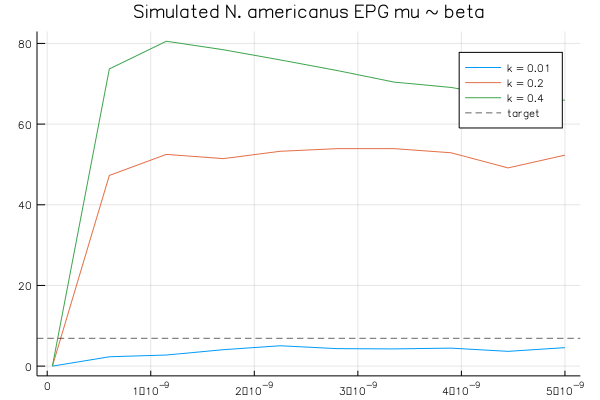

In [11]:
N_a_mu = hcat([fit_nb(round(scale_N_a_sensitivity[:,x]))[2] for x in 1:30])
N_a_mu = hcat(N_a_mu[1:10], N_a_mu[11:20], N_a_mu[21:30])
plot(b_N_a_full, N_a_mu,
      title = "Simulated N. americanus EPG mu ~ beta", label = ["k = 0.01", "k = 0.2", "k = 0.4"])
hline!([6.9], line = (1, :dash, 0.6, :black), label = :target)

Simulated Ascaris k. Target is 0.1.

Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, pa

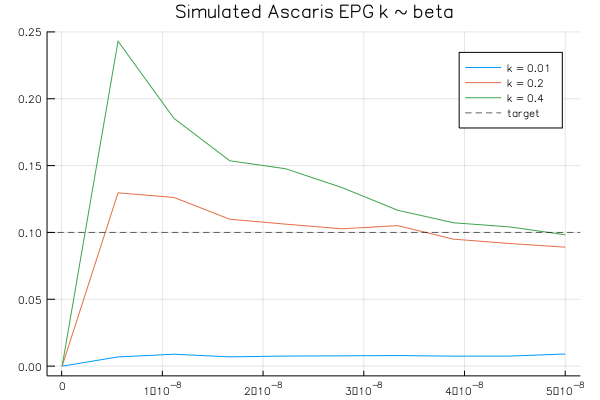

In [12]:
A_l_size = hcat([fit_nb(round(scale_A_l_sensitivity[:,x]))[1] for x in 1:30])
A_l_size = hcat(A_l_size[1:10], A_l_size[11:20], A_l_size[21:30])
plot(b_A_l_full, A_l_size,
      title = "Simulated Ascaris EPG k ~ beta", label = ["k = 0.01", "k = 0.2", "k = 0.4"])
hline!([0.1], line = (1, :dash, 0.6, :black), label = :target)

Simulated Ascaris mu. Target is 249.6

Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, pa

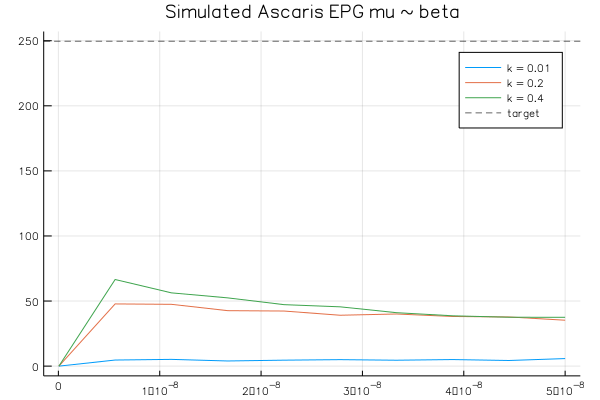

In [13]:
A_l_mu = hcat([fit_nb(round(scale_A_l_sensitivity[:,x]))[2] for x in 1:30])
A_l_mu = hcat(A_l_mu[1:10], A_l_mu[11:20], A_l_mu[21:30])
plot(b_A_l_full, A_l_mu,
      title = "Simulated Ascaris EPG mu ~ beta", label = ["k = 0.01", "k = 0.2", "k = 0.4"])
hline!([249.6], line = (1, :dash, 0.6, :black), label = :target)

Simulated Trichuris k; target is 0.21

Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, pa

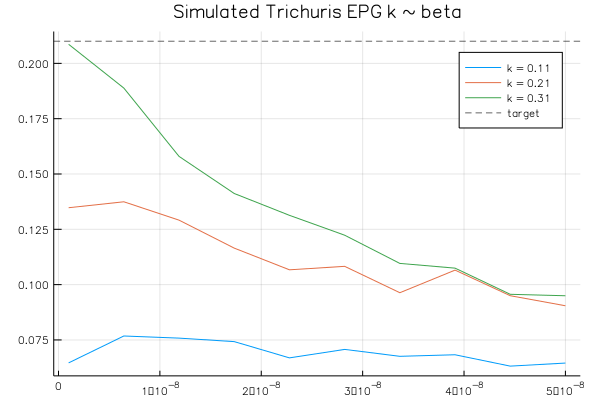

In [14]:
T_t_size = hcat([fit_nb(round(scale_T_t_sensitivity[:,x]))[1] for x in 1:30])
T_t_size = hcat(T_t_size[1:10], T_t_size[11:20], T_t_size[21:30])
plot(b_T_t_full, T_t_size,
      title = "Simulated Trichuris EPG k ~ beta", label = ["k = 0.11", "k = 0.21", "k = 0.31"])
hline!([0.21], line = (1, :dash, 0.6, :black), label = :target)

Simulated Trichuris mu; target 38.8

Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, parm[1], parm[2], ...) : NaNs produced
Warning in densfun(x, pa

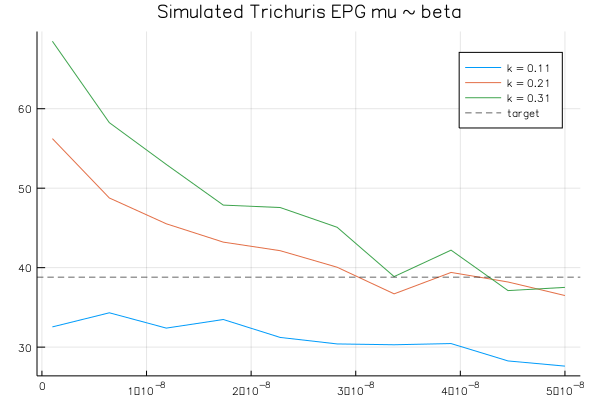

In [15]:
T_t_mu = hcat([fit_nb(round(scale_T_t_sensitivity[:,x]))[2] for x in 1:30])
T_t_mu = hcat(T_t_mu[1:10], T_t_mu[11:20], T_t_mu[21:30])
plot(b_T_t_full, T_t_mu,
      title = "Simulated Trichuris EPG mu ~ beta", label = ["k = 0.11", "k = 0.21", "k = 0.31"])
hline!([38.8], line = (1, :dash, 0.6, :black), label = :target)

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*